Testing with getbest=False 

In [1]:
from rdkit import Chem 
from rdkit.Chem import Draw 
import py3Dmol 
from ipywidgets import interact, interactive, fixed 
from espsim import EmbedAlignConstrainedScore, EmbedAlignScore, ConstrainedEmbedMultipleConfs, GetEspSim, GetShapeSim 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import numpy
import scipy.stats as ss 
from scipy.stats import spearmanr 

In [2]:
# Probe molecule 
prbSmile='C(C(C(=O)O)O)O'
prbMol=Chem.AddHs(Chem.MolFromSmiles(prbSmile)) 

# Reference molecules 
header_list=["smiles"]
refSmiles = pd.read_csv('/Users/yada/Documents/UCL/Dissertation/deepFMPOv3D-main/Data/molecules.smi',header=None,names=header_list) 
refMols=[Chem.AddHs(Chem.MolFromSmiles(x)) for x in refSmiles["smiles"]] 


In [3]:
# SIMILARITY CALCULATION BY GASTEIGER 

simShape_Gas,simEsp_Gas=EmbedAlignScore(prbMol,refMols,getBestESP=False,prbNumConfs = 10,refNumConfs = 10,prbCharge = [],refCharges = [],metric = "carbo",integrate = "gauss",partialCharges = "gasteiger",renormalize = True) 

# Average 
avrlist_Gas=[] 
for i in range(len(refSmiles)): 
    avr=(simShape_Gas[i]+simEsp_Gas[i])/2
    avrlist_Gas.append(avr) 

# Ranking 
rank_Gas_Shape = ss.rankdata(simShape_Gas) # Ranking shape 
rank_Gas_ESP = ss.rankdata (simEsp_Gas) # Ranking ESP
rank_Gas_avr = ss.rankdata(avrlist_Gas) # Ranking average values 

print('%68s %8s %7s %10s %10s %8s %10s' % ("Reference","Shape","ESP","Average","Rank Shape","Rank ESP","Rank Average"))
for i in range(len(refSmiles)): 
    print('%68s %8.2f %8.2f %8.2f %8.2f %8.2f %8.2f' % (refSmiles["smiles"][i],simShape_Gas[i],simEsp_Gas[i],avr,rank_Gas_Shape[i],rank_Gas_ESP[i],rank_Gas_avr[i]))

  

RDKit ERROR: [17:29:06] UFFTYPER: Unrecognized charge state for atom: 16
[17:29:06] UFFTYPER: Unrecognized charge state for atom: 16
RDKit ERROR: [17:31:59] UFFTYPER: Unrecognized charge state for atom: 17
[17:31:59] UFFTYPER: Unrecognized charge state for atom: 17
RDKit ERROR: [17:32:36] UFFTYPER: Unrecognized charge state for atom: 16
[17:32:36] UFFTYPER: Unrecognized charge state for atom: 16


                                                           Reference    Shape     ESP    Average Rank Shape Rank ESP Rank Average
    S(=O)(=O)(N)c1ccc(N/N=C/2\C(=O)Nc3c\2c(/C=C/c2ccc(O)cc2)ccc3)cc1     0.22     0.53     0.36   277.00   504.00   403.00
    S(=O)(=O)(Nc1cc(-c2[nH]nc(Nc3ccc(S(=O)(=O)N)cc3)c2)ccc1)c1ccccc1     0.21     0.48     0.36   164.00   280.00   190.00
                           O=Nc1c(-c2c(O)[nH]c3c2cccc3)[nH]c2c1cccc2     0.35     0.72     0.36  1021.00  1039.00  1053.00
            O=C1NC(=O)c2c3c4n(c5c3cccc5)C3OC(n5c4c(c4c5cccc4)c12)CC3     0.25     0.47     0.36   609.00   258.00   301.00
                Brc1ccc(CC(=O)Nc2n[nH]c3c2cc(N2S(=O)(=O)CCC2)cc3)cc1     0.24     0.53     0.36   444.00   549.00   502.00
                 Clc1cc(Nc2nc(N3[C@@H](CO)CCC3)nc3n(C(C)C)cnc23)ccc1     0.26     0.74     0.36   710.00  1048.00  1039.00
                        OC[C@H](Nc1nc(NCc2ccccc2)c2ncn(C(C)C)c2n1)CC     0.24     0.61     0.36   523.00   858.00   800.00
         

In [4]:
# SIMILARITY CALCULATION BY MMFF 

simShape_mmff,simEsp_mmff=EmbedAlignScore(prbMol,refMols,getBestESP=False,prbNumConfs = 10,refNumConfs = 10,prbCharge = [],refCharges = [],metric = "carbo",integrate = "gauss",partialCharges = "mmff",renormalize = True) 

avrlist_mmff=[]
for i in range(len(refSmiles)): 
    avr=(simShape_mmff[i]+simEsp_mmff[i])/2
    avrlist_mmff.append(avr)

rank_mmff_avr = ss.rankdata(avrlist_mmff)
rank_mmff_Shape = ss.rankdata(simShape_mmff)
rank_mmff_ESP = ss.rankdata(simEsp_mmff)

print('%68s %8s %7s %10s %10s %8s %10s' % ("Reference","Shape","ESP","Average","Rank Shape","Rank ESP","Rank Average"))
for i in range(len(refSmiles)): 
    print('%68s %8.2f %8.2f %8.2f %8.2f %8.2f %8.2f' % (refSmiles["smiles"][i],simShape_mmff[i],simEsp_mmff[i],avr,rank_mmff_Shape[i],rank_mmff_ESP[i],rank_mmff_avr[i]))
  
    

RDKit ERROR: [17:42:26] UFFTYPER: Unrecognized charge state for atom: 16
[17:42:26] UFFTYPER: Unrecognized charge state for atom: 16
RDKit ERROR: [17:45:49] UFFTYPER: Unrecognized charge state for atom: 17
[17:45:49] UFFTYPER: Unrecognized charge state for atom: 17
RDKit ERROR: [17:46:37] UFFTYPER: Unrecognized charge state for atom: 16
[17:46:37] UFFTYPER: Unrecognized charge state for atom: 16


MMFF charges not available for the input molecule, defaulting to Gasteiger charges.
MMFF charges not available for the input molecule, defaulting to Gasteiger charges.
MMFF charges not available for the input molecule, defaulting to Gasteiger charges.
MMFF charges not available for the input molecule, defaulting to Gasteiger charges.
MMFF charges not available for the input molecule, defaulting to Gasteiger charges.
                                                           Reference    Shape     ESP    Average Rank Shape Rank ESP Rank Average
    S(=O)(=O)(N)c1ccc(N/N=C/2\C(=O)Nc3c\2c(/C=C/c2ccc(O)cc2)ccc3)cc1     0.22     0.45     0.37   277.00   228.00   177.00
    S(=O)(=O)(Nc1cc(-c2[nH]nc(Nc3ccc(S(=O)(=O)N)cc3)c2)ccc1)c1ccccc1     0.21     0.59     0.37   164.00   771.00   610.00
                           O=Nc1c(-c2c(O)[nH]c3c2cccc3)[nH]c2c1cccc2     0.35     0.73     0.37  1021.00  1037.00  1048.00
            O=C1NC(=O)c2c3c4n(c5c3cccc5)C3OC(n5c4c(c4c5cccc4)c12)CC3     0.25    

In [5]:
# Correlation coefficient function  

def CorrCoef (x,y):
    corr_matrix = numpy.corrcoef(x,y)
    corr = corr_matrix[0,1]
    R_sq = corr**2
    print ('Correlation coeffcient = %.3f' % R_sq)
    return

# Spearmans rank Function 
def SpearRank (x,y):
	# Calculating correlation coefficient 
	coef, p = spearmanr(x,y)
	print('Spearmans correlation coefficient: %.3f' % coef)
	# Interpret the significance 
	



SIMILARITY SCORES - GASTEIGER 

Correlation coeffcient = 0.015
Spearmans correlation coefficient: 0.096


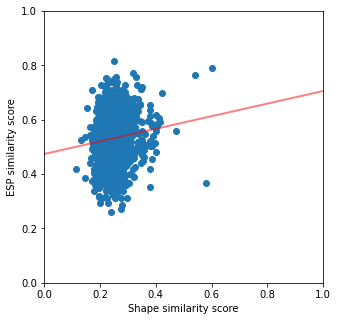

In [6]:
# SHAPE VS ESP

# Setting size of plot 
fig, ax = plt.subplots(figsize = (5,5)) 
# Setting axis ranges 
plt.xlim(0,1) # Similarity calculations ranges from 0-1, the closer to 1 the higher the similarity 
plt.ylim(0,1)
#Setting axis labels and plot title 
plt.xlabel("Shape similarity score")
plt.ylabel("ESP similarity score")
# this is the order that you have to follow 
# important to set up the axis labels and ranges before presenting the plot 

# Add scatterplot 
ax.scatter (simShape_Gas, simEsp_Gas ) 

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(simShape_Gas, simEsp_Gas, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 1)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="red", alpha=0.5, lw=2)

# Correlation coefficient 
CorrCoef(simShape_Gas, simEsp_Gas)

# Spearman rank 
SpearRank(simShape_Gas, simEsp_Gas)

Correlation coeffcient = 0.301
Spearmans correlation coefficient: 0.481


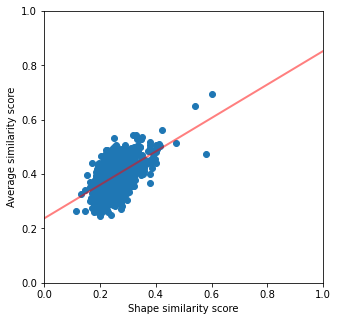

In [7]:
# SHAPE VS AVERAGE 

fig, ax = plt.subplots(figsize = (5,5)) 
plt.xlim(0,1) 
plt.ylim(0,1)
plt.xlabel("Shape similarity score")
plt.ylabel("Average similarity score")

ax.scatter (simShape_Gas, avrlist_Gas ) 


b, a = np.polyfit(simShape_Gas, avrlist_Gas, deg=1)

xseq = np.linspace(0, 1)
ax.plot(xseq, a + b * xseq, color="red", alpha=0.5, lw=2)

CorrCoef(simShape_Gas, avrlist_Gas)
SpearRank(simShape_Gas, avrlist_Gas)


Correlation coeffcient = 0.804
Spearmans correlation coefficient: 0.896


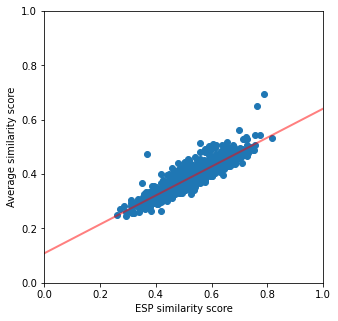

In [8]:
# ESP VS AVERAGE 

fig, ax = plt.subplots(figsize = (5,5)) 
plt.xlim(0,1) 
plt.ylim(0,1)
plt.xlabel("ESP similarity score")
plt.ylabel("Average similarity score")

ax.scatter (simEsp_Gas, avrlist_Gas ) 


b, a = np.polyfit(simEsp_Gas, avrlist_Gas, deg=1)

xseq = np.linspace(0, 1)
ax.plot(xseq, a + b * xseq, color="red", alpha=0.5, lw=2)

CorrCoef(simEsp_Gas, avrlist_Gas)
SpearRank(simEsp_Gas, avrlist_Gas)

RANKING BY GASTEIGER 

Correlation coeffcient = 0.009
Spearmans correlation coefficient: 0.096


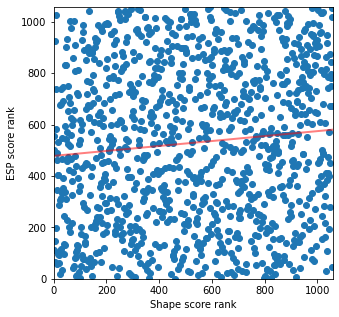

In [9]:
# SHAPE VS ESP

fig, ax = plt.subplots(figsize = (5,5)) 
plt.xlim(0,len(refSmiles))
plt.ylim(0,len(refSmiles))
plt.xlabel("Shape score rank")
plt.ylabel("ESP score rank")
ax.scatter (rank_Gas_Shape, rank_Gas_ESP ) 

b, a = np.polyfit(rank_Gas_Shape, rank_Gas_ESP, deg=1)
xseq = np.linspace(0, len(refSmiles))
ax.plot (xseq, a + b * xseq, color="red", alpha=0.5, lw=2)
CorrCoef(rank_Gas_Shape, rank_Gas_ESP)
SpearRank(rank_Gas_Shape, rank_Gas_ESP)

Correlation coeffcient = 0.231
Spearmans correlation coefficient: 0.481


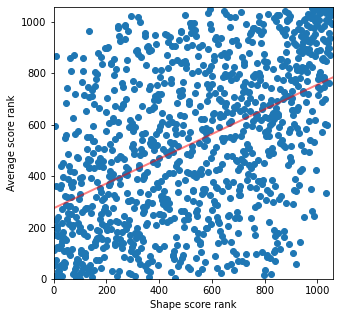

In [10]:
# SHAPE VS AVERAGE 

fig, ax = plt.subplots(figsize = (5,5)) 
plt.xlim(0,len(refSmiles))
plt.ylim(0,len(refSmiles))
plt.xlabel("Shape score rank")
plt.ylabel("Average score rank")
ax.scatter (rank_Gas_Shape, rank_Gas_avr ) 

b, a = np.polyfit(rank_Gas_Shape, rank_Gas_avr, deg=1)
xseq = np.linspace(0, len(refSmiles))
ax.plot (xseq, a + b * xseq, color="red", alpha=0.5, lw=2)
CorrCoef(rank_Gas_Shape, rank_Gas_avr)
SpearRank(rank_Gas_Shape, rank_Gas_avr)

Correlation coeffcient = 0.802
Spearmans correlation coefficient: 0.896


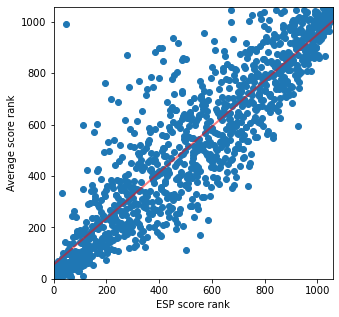

In [11]:
# EPS VS AVERAGE 

fig, ax = plt.subplots(figsize = (5,5)) 
plt.xlim(0,len(refSmiles))
plt.ylim(0,len(refSmiles))
plt.xlabel("ESP score rank")
plt.ylabel("Average score rank")
ax.scatter (rank_Gas_ESP, rank_Gas_avr ) 

b, a = np.polyfit(rank_Gas_ESP, rank_Gas_avr, deg=1)
xseq = np.linspace(0, len(refSmiles))
ax.plot (xseq, a + b * xseq, color="red", alpha=0.5, lw=2)
CorrCoef(rank_Gas_ESP, rank_Gas_avr)
SpearRank(rank_Gas_ESP, rank_Gas_avr)

COMPARING SIMILARITY SCORE - GASTEIGER VS MMFF 

Correlation coeffcient = 1.000
Spearmans correlation coefficient: 1.000


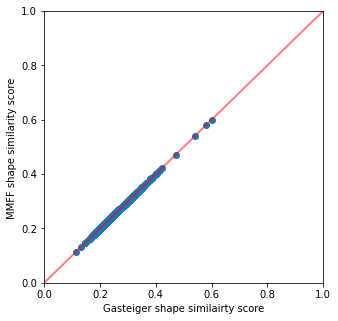

In [12]:
# SHAPE 

fig, ax = plt.subplots(figsize = (5,5)) 

plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("Gasteiger shape similairty score")
plt.ylabel("MMFF shape similarity score ")
ax.scatter (simShape_Gas,simShape_mmff ) 

b, a = np.polyfit(simShape_Gas,simShape_mmff, deg=1)
xseq = np.linspace(0,1)
ax.plot (xseq, a + b * xseq, color="red", alpha=0.5, lw=2)
CorrCoef(simShape_Gas,simShape_mmff)
SpearRank(simShape_Gas,simShape_mmff)



Correlation coeffcient = 0.526
Spearmans correlation coefficient: 0.717


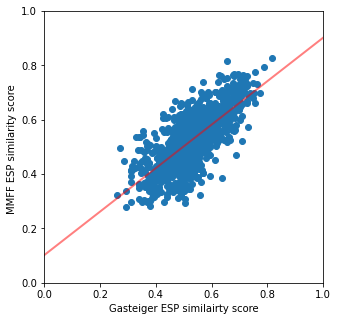

In [13]:
# ESP 

fig, ax = plt.subplots(figsize = (5,5)) 

plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("Gasteiger ESP similairty score")
plt.ylabel("MMFF ESP similarity score ")
ax.scatter (simEsp_Gas,simEsp_mmff ) 

b, a = np.polyfit(simEsp_Gas,simEsp_mmff, deg=1)
xseq = np.linspace(0,1)
ax.plot (xseq, a + b * xseq, color="red", alpha=0.5, lw=2)
CorrCoef(simEsp_Gas,simEsp_mmff)
SpearRank(simEsp_Gas,simEsp_mmff)

Correlation coeffcient = 0.641
Spearmans correlation coefficient: 0.768


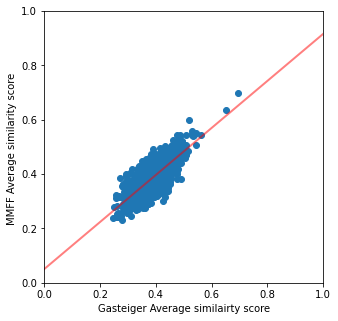

In [14]:
# AVERAGE

fig, ax = plt.subplots(figsize = (5,5)) 

plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("Gasteiger Average similairty score")
plt.ylabel("MMFF Average similarity score ")
ax.scatter (avrlist_Gas,avrlist_mmff) 

b, a = np.polyfit(avrlist_Gas,avrlist_mmff, deg=1)
xseq = np.linspace(0,1)
ax.plot (xseq, a + b * xseq, color="red", alpha=0.5, lw=2)
CorrCoef(avrlist_Gas,avrlist_mmff)
SpearRank(avrlist_Gas,avrlist_mmff)

COMPARING RANK - GASTEIGER VS MMFF 

Correlation coeffcient = 1.000
Spearmans correlation coefficient: 1.000


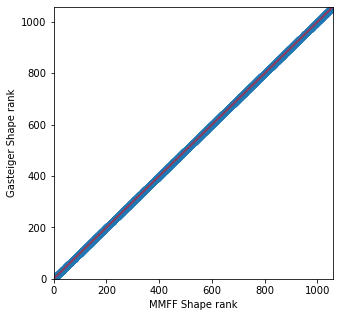

In [15]:
# SHAPE 

fig, ax = plt.subplots(figsize = (5,5)) 

plt.xlim(0,len(refSmiles)) 
plt.ylim(0,len(refSmiles))
plt.xlabel("MMFF Shape rank")
plt.ylabel("Gasteiger Shape rank")

ax.scatter (rank_mmff_Shape,rank_Gas_Shape) 
b, a = np.polyfit(rank_mmff_Shape,rank_Gas_Shape, deg=1)
xseq = np.linspace(0, len(refSmiles))  
ax.plot(xseq, a + b * xseq, color="red", alpha=0.5, lw=2)

CorrCoef(rank_mmff_Shape,rank_Gas_Shape)
SpearRank(rank_mmff_Shape,rank_Gas_Shape)


Correlation coeffcient = 0.514
Spearmans correlation coefficient: 0.717


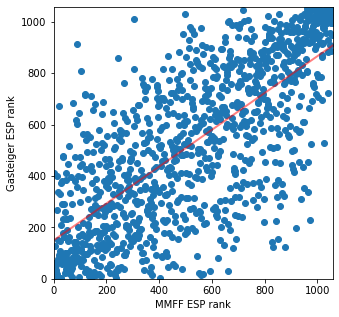

In [16]:
# ESP 

fig, ax = plt.subplots(figsize = (5,5)) 

plt.xlim(0,len(refSmiles))
plt.ylim(0,len(refSmiles))
plt.xlabel("MMFF ESP rank")
plt.ylabel("Gasteiger ESP rank")
ax.scatter (rank_mmff_ESP,rank_Gas_ESP) 

b, a = np.polyfit(rank_mmff_ESP,rank_Gas_ESP, deg=1)
xseq = np.linspace(0, len(refSmiles)) 
ax.plot(xseq, a + b * xseq, color="red", alpha=0.5, lw=2)

CorrCoef(rank_mmff_ESP,rank_Gas_ESP)
SpearRank(rank_mmff_ESP,rank_Gas_ESP)


Correlation coeffcient = 0.590
Spearmans correlation coefficient: 0.768


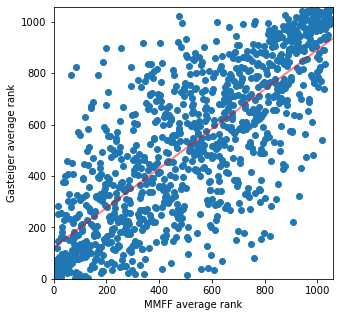

In [17]:
# AVERAGE

fig, ax = plt.subplots(figsize = (5,5)) 

plt.xlim(0,len(refSmiles)) 
plt.ylim(0,len(refSmiles))
plt.xlabel("MMFF average rank")
plt.ylabel("Gasteiger average rank")
ax.scatter (rank_mmff_avr,rank_Gas_avr) 

b, a = np.polyfit(rank_mmff_avr,rank_Gas_avr, deg=1)
xseq = np.linspace(0, len(refSmiles))  
ax.plot(xseq, a + b * xseq, color="red", alpha=0.5, lw=2)

# Correlation coefficient 
CorrCoef(rank_mmff_avr,rank_Gas_avr)
SpearRank(rank_mmff_avr,rank_Gas_avr)